In [463]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
warnings.filterwarnings('ignore')

In [465]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [467]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [469]:
df.shape

(6607, 20)

In [471]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [473]:
sns.set(style='whitegrid')

In [475]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [477]:
df=df.dropna()

In [479]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [481]:
df.duplicated().sum()

0

In [483]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [485]:
df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3251,3204,3807,3237,5893,2582,3826,4434,2553,5710,3159,3801,3688


In [487]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [489]:
categorical_cols=['Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities',
        'Motivation_Level', 'Internet_Access',
     'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
                 ]

In [491]:
for col in categorical_cols:
    print(f"Value Count for column {col} :\n {df[col].value_counts()}")

Value Count for column Parental_Involvement :
 Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
Value Count for column Access_to_Resources :
 Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
Value Count for column Extracurricular_Activities :
 Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
Value Count for column Motivation_Level :
 Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
Value Count for column Internet_Access :
 Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
Value Count for column Family_Income :
 Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
Value Count for column Teacher_Quality :
 Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
Value Count for column School_Type :
 School_Type
Public     4434
Private    1944
Name: count, dtype:

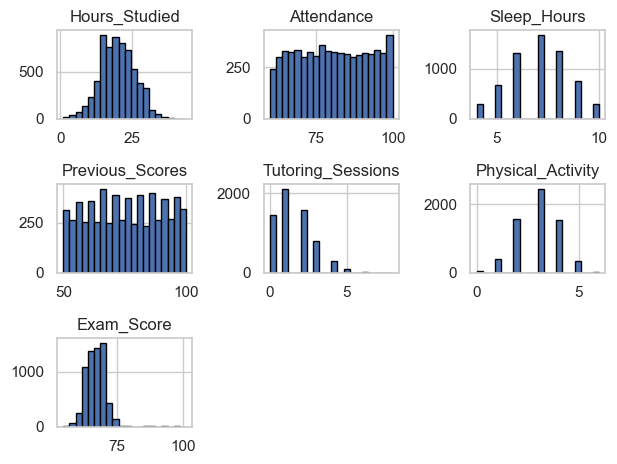

In [493]:
df.hist(bins=20,edgecolor='black')
plt.tight_layout()
plt.show()

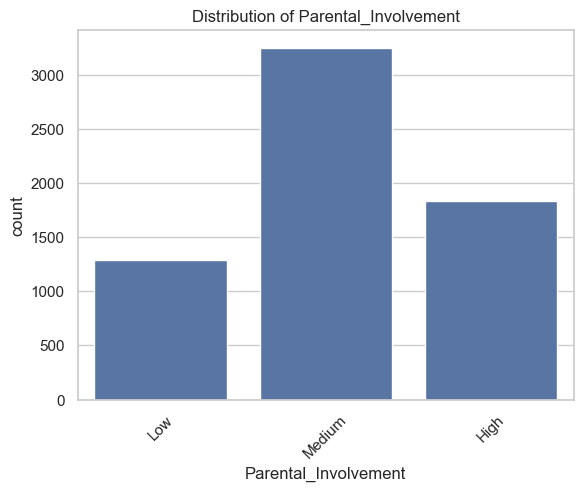

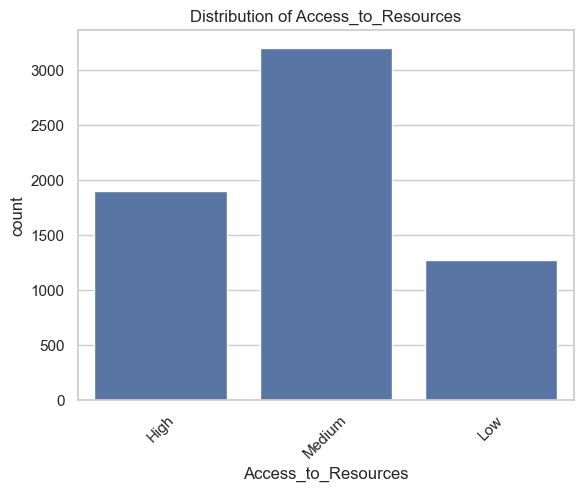

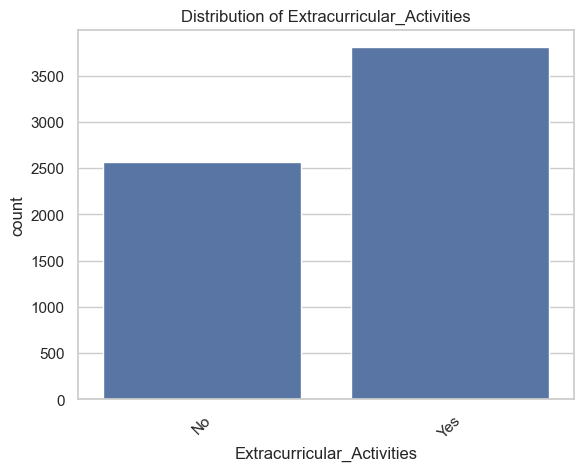

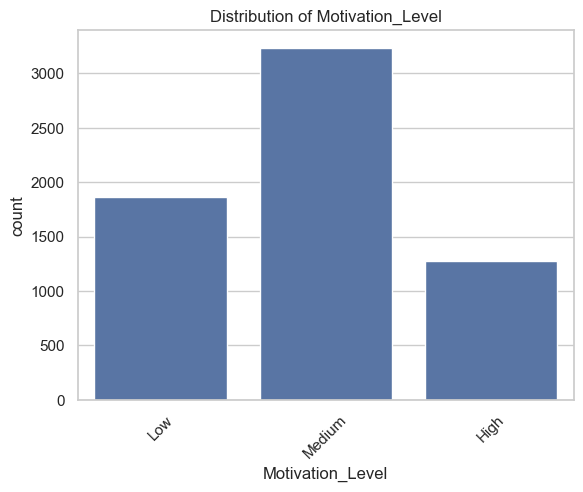

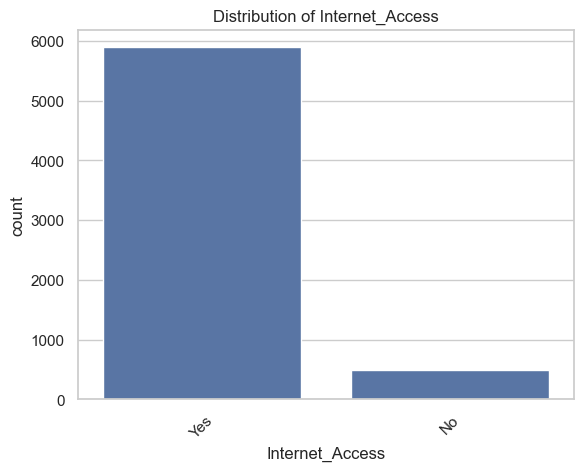

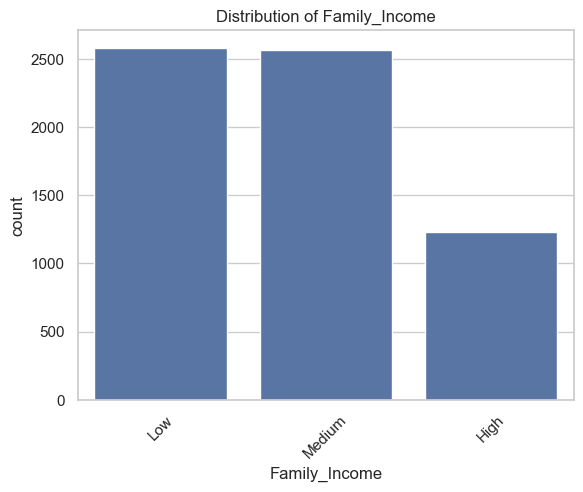

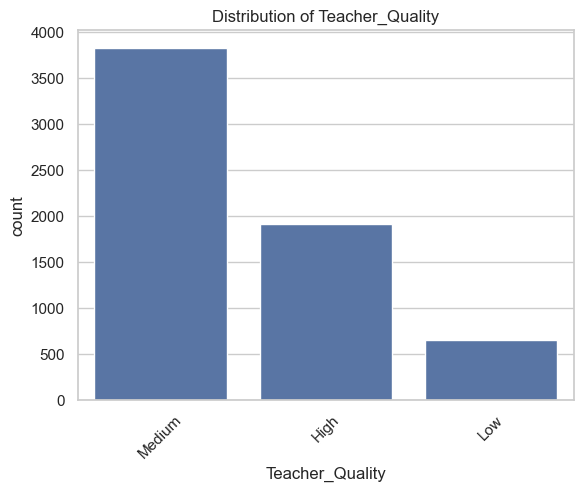

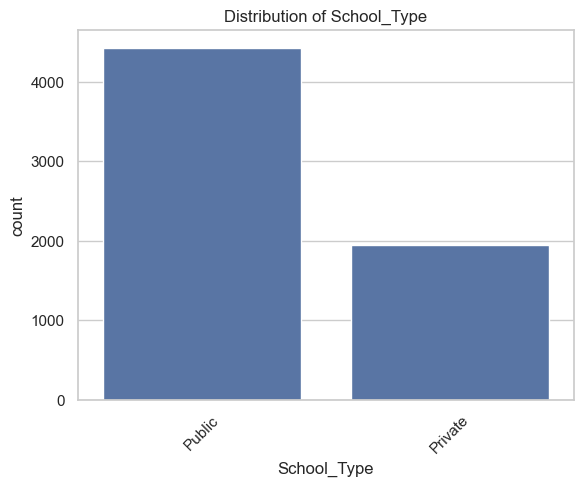

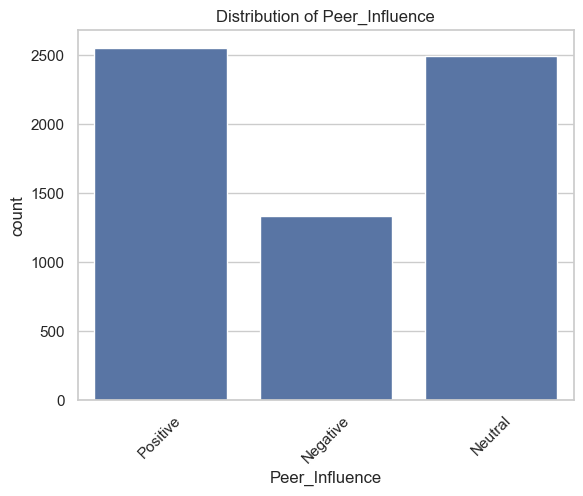

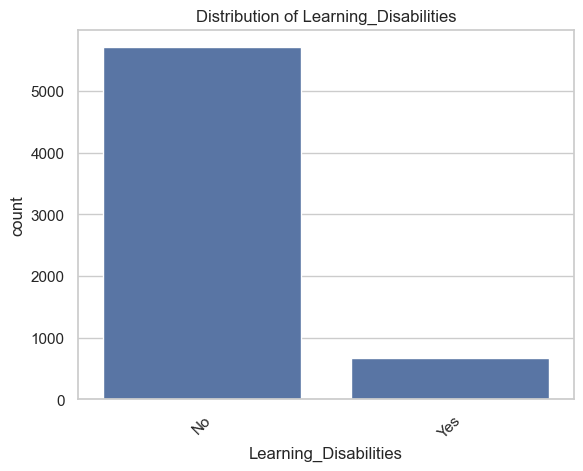

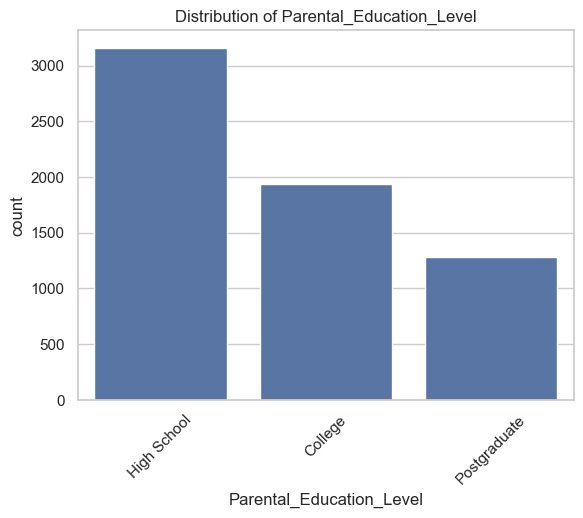

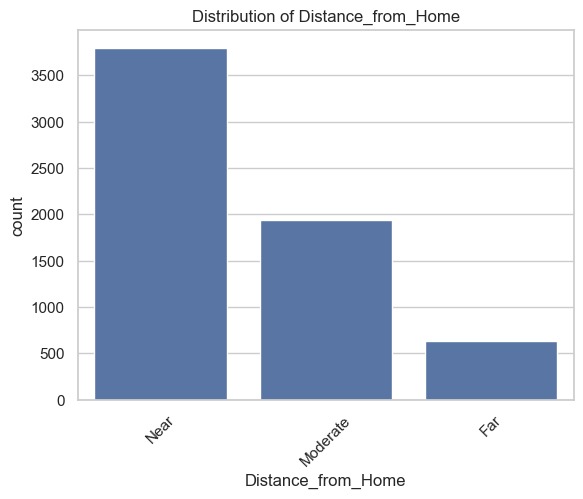

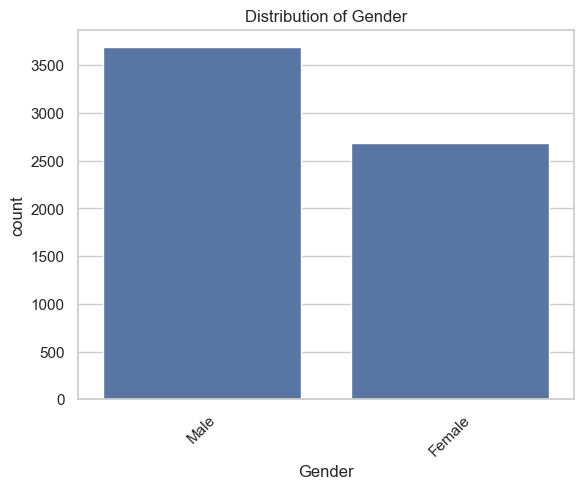

In [494]:
for col in categorical_cols:
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

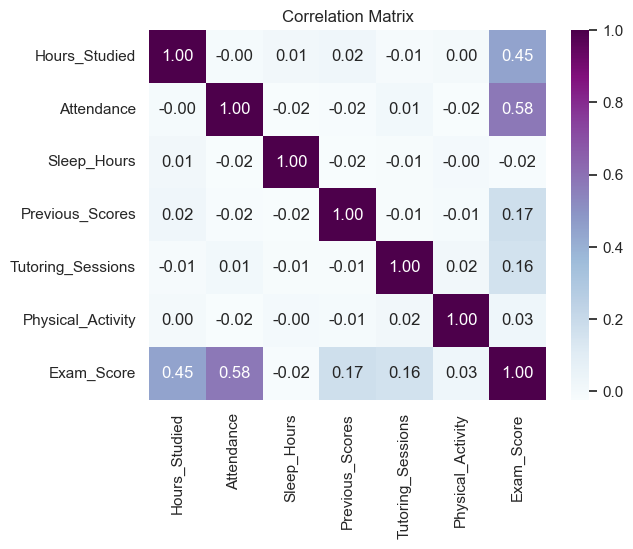

In [495]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='BuPu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [497]:
num_features=['Hours_Studied', 'Attendance',
       'Sleep_Hours',
       'Previous_Scores',
       'Tutoring_Sessions',
     'Physical_Activity']

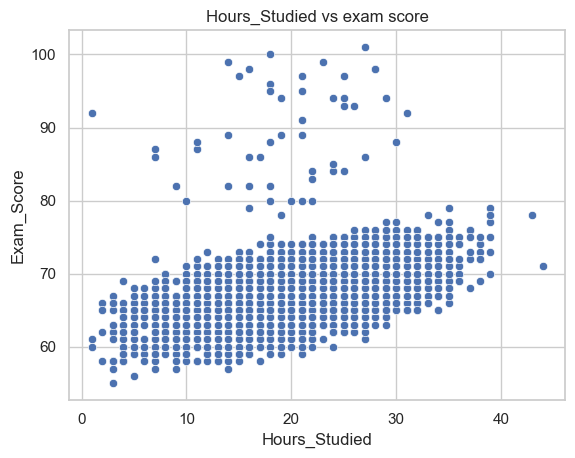

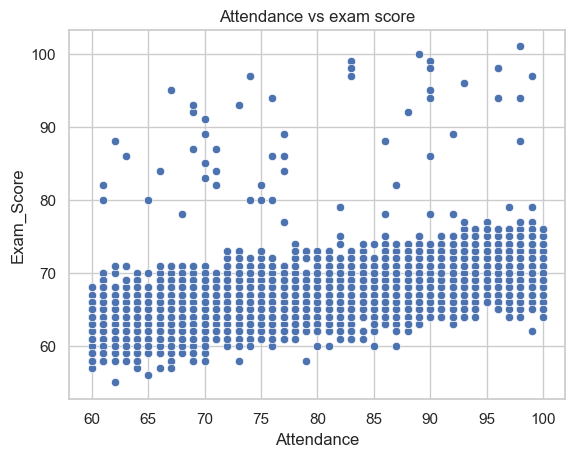

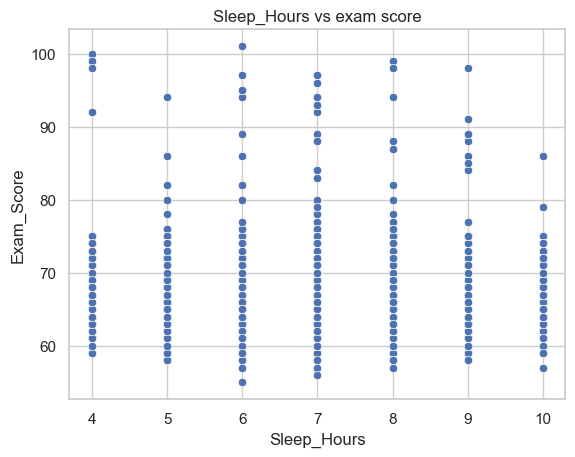

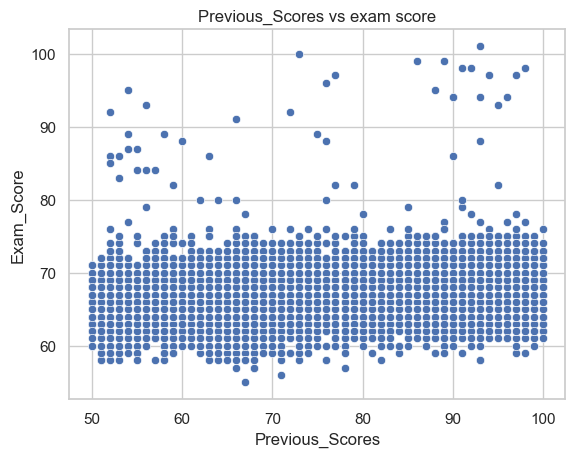

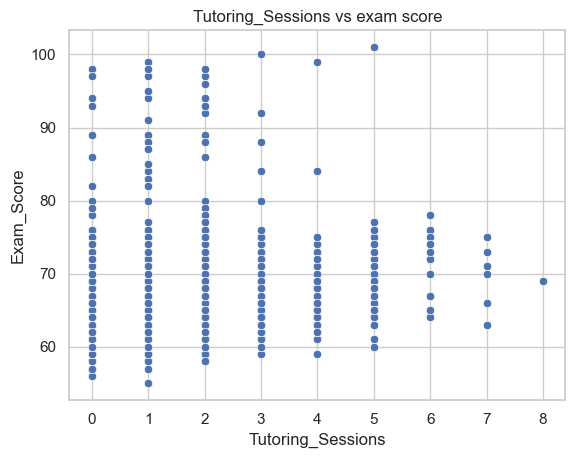

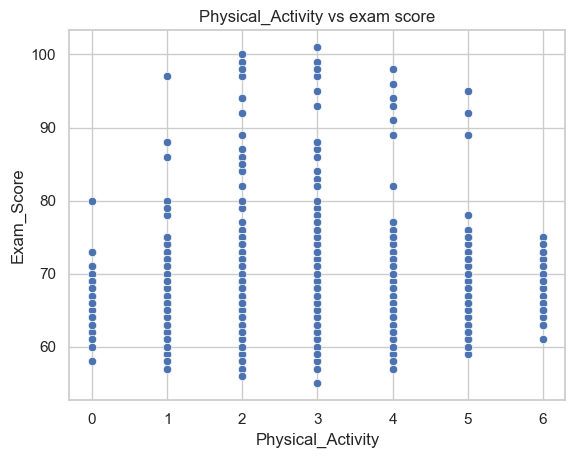

In [498]:
for feature in num_features:
    sns.scatterplot(data=df,x=feature,y='Exam_Score')
    plt.title(f'{feature} vs exam score')
    plt.show()

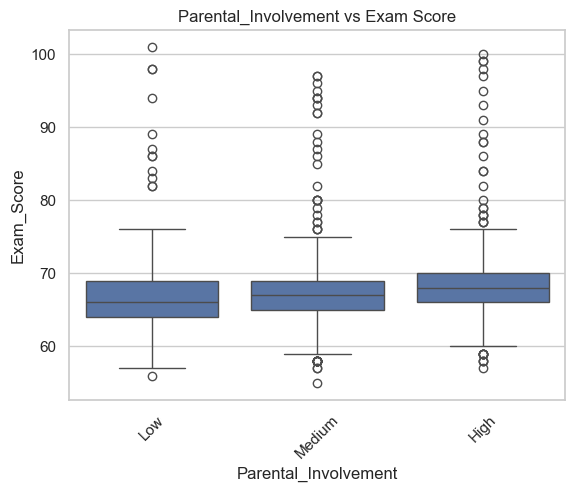

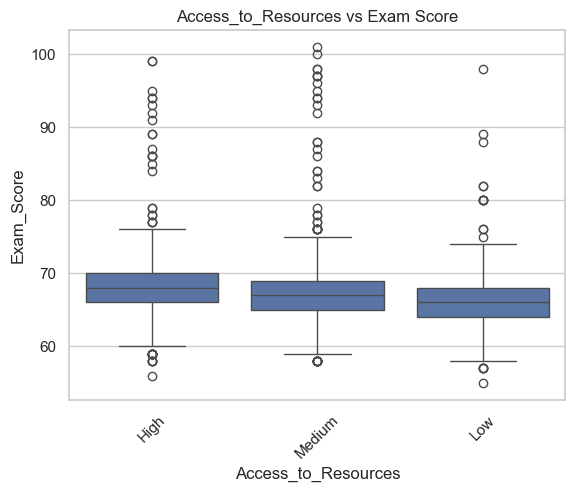

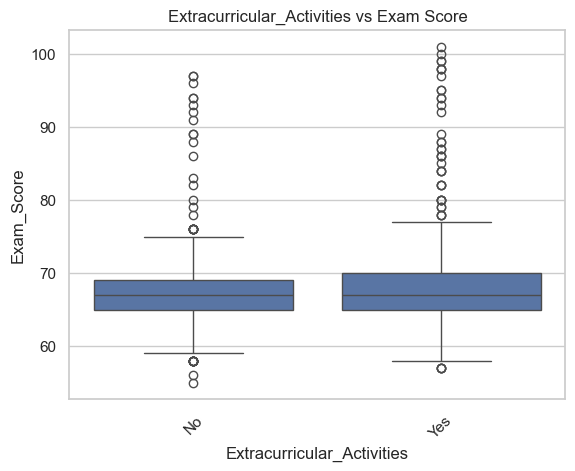

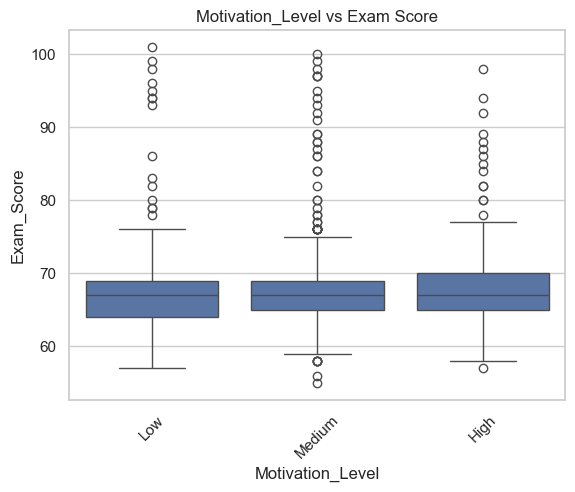

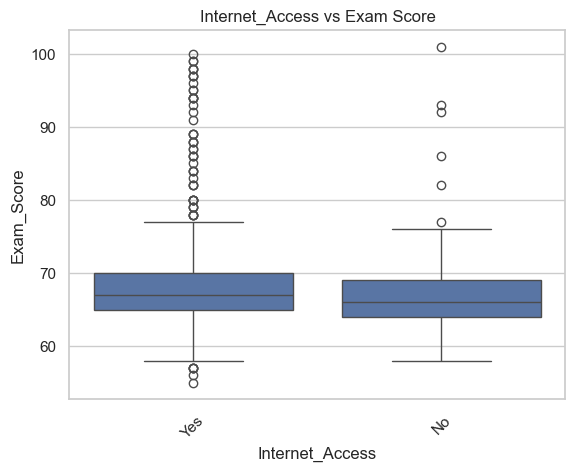

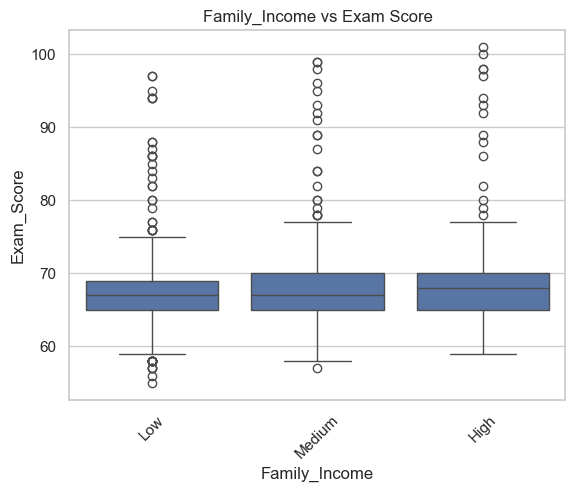

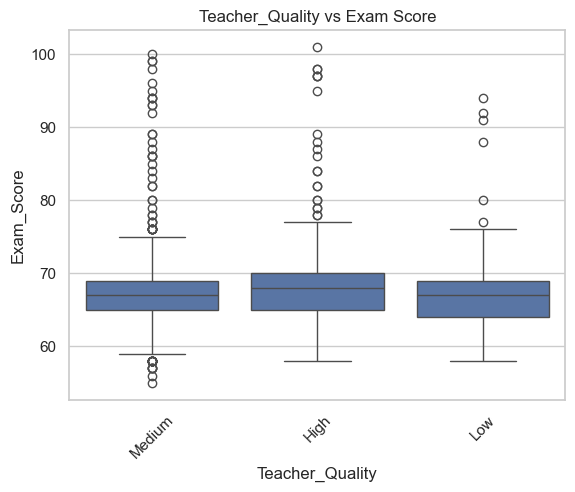

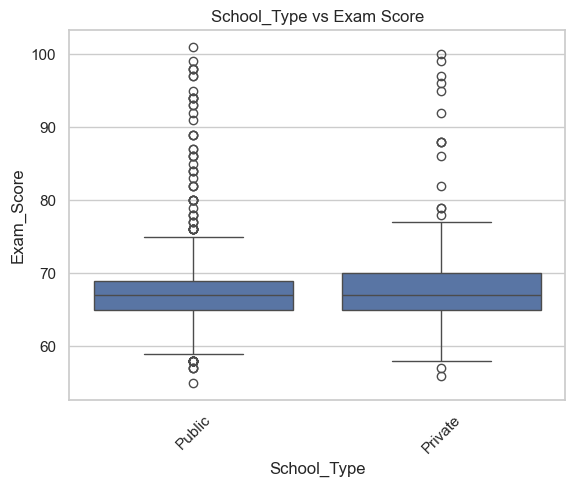

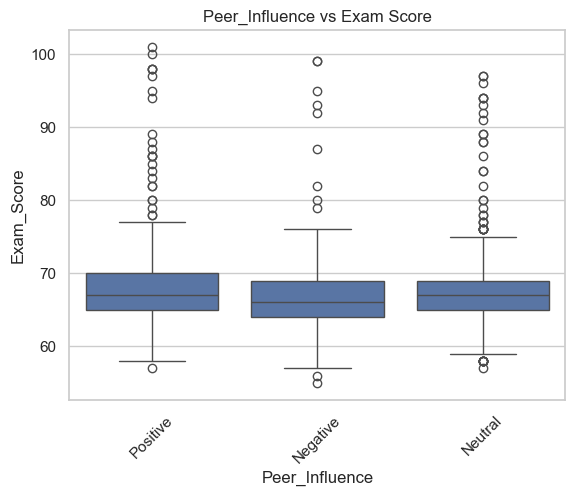

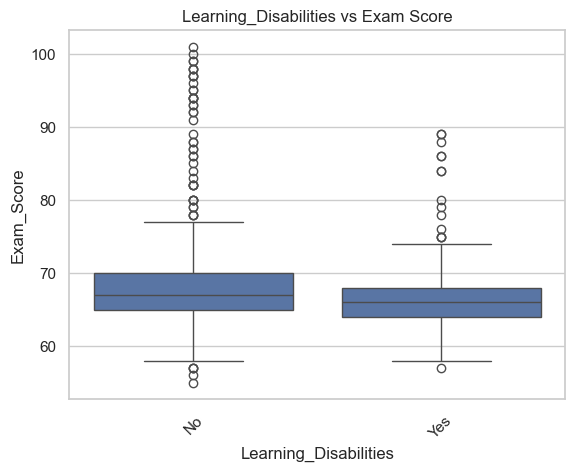

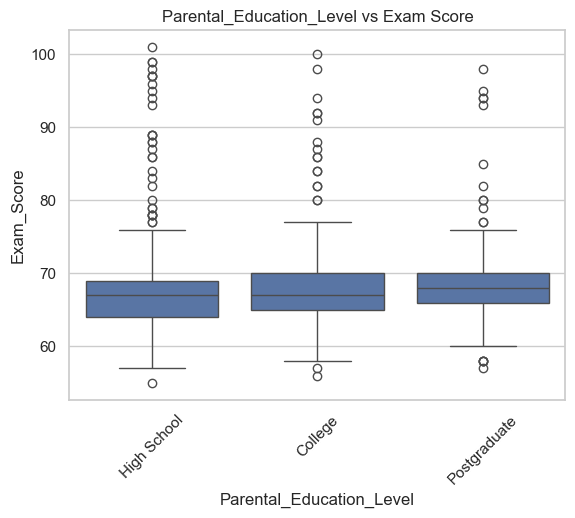

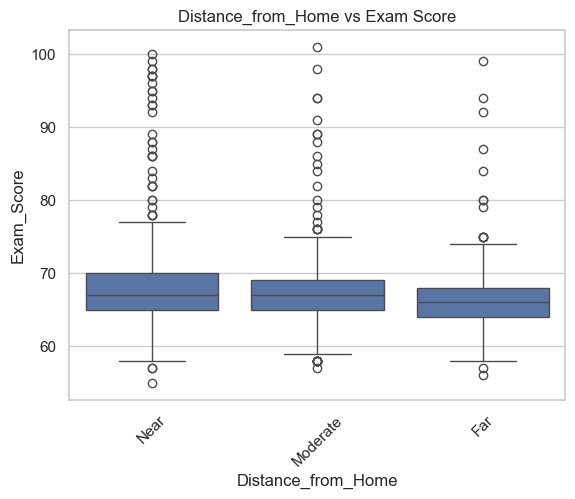

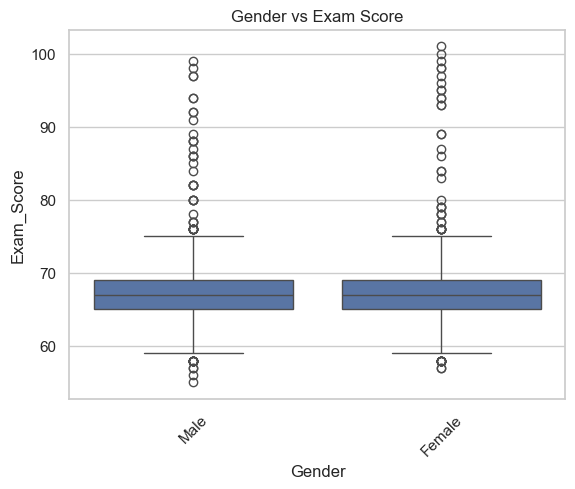

In [499]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y='Exam_Score')
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()

In [500]:
features=['Hours_Studied', 'Attendance',
       'Sleep_Hours',
       'Previous_Scores',
       'Tutoring_Sessions','Motivation_Level','Internet_Access','Learning_Disabilities','Peer_Influence']

In [505]:
target=['Exam_Score']

In [426]:
df_model=df[features+target].copy()

In [427]:
df_model

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Motivation_Level,Internet_Access,Learning_Disabilities,Peer_Influence,Exam_Score
0,23,84,7,73,0,Low,Yes,No,Positive,67
1,19,64,8,59,2,Low,Yes,No,Negative,61
2,24,98,7,91,2,Medium,Yes,No,Neutral,74
3,29,89,8,98,1,Medium,Yes,No,Negative,71
4,19,92,6,65,3,Medium,Yes,No,Neutral,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,Medium,Yes,No,Positive,68
6603,23,76,8,81,3,Medium,Yes,No,Positive,69
6604,20,90,6,65,3,Low,Yes,No,Negative,68
6605,10,86,6,91,2,High,Yes,No,Positive,68


In [429]:
le=LabelEncoder()
values_Motivation_Level=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Motivation_Level)
df_model['Motivation_Level']=ord.fit_transform(df_model[['Motivation_Level']])
values_Internet_Access=[['No','Yes']]
ord=OrdinalEncoder(categories=values_Internet_Access)
df_model['Internet_Access']=ord.fit_transform(df_model[['Internet_Access']])
values_Learning_Disabilities=[['No','Yes']]
ord=OrdinalEncoder(categories=values_Learning_Disabilities)
df_model['Learning_Disabilities']=ord.fit_transform(df_model[['Learning_Disabilities']])
values_Peer_Influence=[['Negative','Neutral','Positive']]
ord=OrdinalEncoder(categories=values_Peer_Influence)
df_model['Peer_Influence']=ord.fit_transform(df_model[['Peer_Influence']])

In [432]:
df_model

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Motivation_Level,Internet_Access,Learning_Disabilities,Peer_Influence,Exam_Score
0,23,84,7,73,0,0.0,1.0,0.0,2.0,67
1,19,64,8,59,2,0.0,1.0,0.0,0.0,61
2,24,98,7,91,2,1.0,1.0,0.0,1.0,74
3,29,89,8,98,1,1.0,1.0,0.0,0.0,71
4,19,92,6,65,3,1.0,1.0,0.0,1.0,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,1.0,1.0,0.0,2.0,68
6603,23,76,8,81,3,1.0,1.0,0.0,2.0,69
6604,20,90,6,65,3,0.0,1.0,0.0,0.0,68
6605,10,86,6,91,2,2.0,1.0,0.0,2.0,68


In [433]:
x=df_model.drop(columns=['Exam_Score'])
y=df_model['Exam_Score']
x

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Motivation_Level,Internet_Access,Learning_Disabilities,Peer_Influence
0,23,84,7,73,0,0.0,1.0,0.0,2.0
1,19,64,8,59,2,0.0,1.0,0.0,0.0
2,24,98,7,91,2,1.0,1.0,0.0,1.0
3,29,89,8,98,1,1.0,1.0,0.0,0.0
4,19,92,6,65,3,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,1.0,1.0,0.0,2.0
6603,23,76,8,81,3,1.0,1.0,0.0,2.0
6604,20,90,6,65,3,0.0,1.0,0.0,0.0
6605,10,86,6,91,2,2.0,1.0,0.0,2.0


In [435]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [436]:
models={
    'LinearRegression':{'model':LinearRegression(),
                       'params':{}},
    'DecisionTree':{'model': DecisionTreeRegressor(),
                    'params':{'max_depth':[3,5,10],'min_samples_split':[2,5]}
    },'RandomForest':{'model':RandomForestRegressor(),
                     'params':{'n_estimators':[50,100],'max_depth':[5,10]}}
    
}

In [437]:
best_models=[]

In [438]:
for name,config in models.items():
    print(f"Training {name}: \n")
    grid=GridSearchCV(config['model'],config['params'],cv=5,scoring='neg_mean_squared_error')
    grid.fit(x_train,y_train)
    y_pred=grid.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    best_models.append({'model':name,
                       'best_params':grid.best_params_,
                       'rmse':rmse,
                       'r2':r2})

Training LinearRegression: 

Training DecisionTree: 

Training RandomForest: 



In [451]:
best_models

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': 2.375222213761519,
  'r2': 0.6369417224059959},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 2},
  'rmse': 2.7367983950626655,
  'r2': 0.5179928689635067},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 10, 'n_estimators': 100},
  'rmse': 2.6536919939324934,
  'r2': 0.5468219369527241}]

In [457]:
results_df=pd.DataFrame(best_models)
results_df.sort_values(by='rmse')

,model,best_params,rmse,r2
0,LinearRegression,{},2.375222,0.636942
2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",2.653692,0.546822
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",2.736798,0.517993
